# analysis

In [1]:
from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
df_proc = pd.read_csv('../data/processed.csv')
df_pred = pd.read_csv('../data/scores_2022_1_22.csv', index_col=0)

df = df_proc.merge(df_pred, on='input_name', how='inner')

df

,input_name,igdb_id,steam_id,personal_rating,feat_rating,feat_popularity,feat_tags_meta_2d,feat_tags_meta_3d,feat_tags_meta_action,feat_tags_meta_adventure,...,feat_emb_text_759,feat_emb_text_760,feat_emb_text_761,feat_emb_text_762,feat_emb_text_763,feat_emb_text_764,feat_emb_text_765,feat_emb_text_766,feat_emb_text_767,predicted_rating
0,8Doors: Arum's Afterlife Adventure,137635.0,668550.0,NaN,79,0.17,1,0,1,1,...,-0.013590,-0.066271,0.049260,0.010090,0.003553,0.016597,0.020447,-0.014808,0.007623,3.905743
1,112 Operator,115270.0,793460.0,NaN,87,0.46,1,0,1,0,...,-0.037108,-0.029286,0.030592,-0.012486,-0.021407,-0.041149,-0.010692,0.063817,-0.031678,4.525658
2,140,9497.0,242820.0,NaN,94,0.40,1,0,1,0,...,0.012563,-0.077963,0.024912,-0.002723,0.014076,0.021067,0.035306,0.008275,-0.012206,3.847322
3,ADOM (Ancient Domains Of Mystery),36159.0,333300.0,NaN,89,0.31,1,0,0,1,...,-0.016336,-0.009888,0.033512,0.006399,0.013531,-0.004189,0.016228,0.011230,-0.003493,4.187257
4,AER Memories of Old,11560.0,331870.0,NaN,87,0.49,0,1,1,1,...,-0.024008,-0.026487,0.024519,0.016934,0.032883,0.009610,-0.001042,0.011012,-0.009780,4.295112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,Rising Star,187043.0,NaN,NaN,100,0.47,0,0,0,0,...,-0.000096,-0.026348,-0.013423,0.007370,0.016168,-0.007438,-0.004562,0.019040,-0.029706,4.691212
2523,Pilotwings Resort,6862.0,NaN,NaN,80,0.27,0,0,1,0,...,-0.022196,-0.053736,-0.018855,0.020747,0.000257,-0.018210,-0.013590,0.033011,0.018694,4.033623
2524,Etrian Odyssey III: The Drowned City,14718.0,NaN,NaN,90,0.18,0,0,0,1,...,0.000366,-0.019079,0.039726,0.003617,0.048743,-0.026022,0.007757,0.000272,-0.029116,4.308850
2525,Castlevania Requiem: Symphony of the Night & R...,109594.0,NaN,NaN,82,0.27,0,0,1,0,...,0.006968,-0.024475,0.029653,0.014796,-0.057699,0.059840,-0.003632,-0.005901,0.005166,4.677905


In [3]:
df_pred.head(25)

,input_name,predicted_rating
439,The Elder Scrolls V: Skyrim,5.996681
620,Half-Life: Alyx,5.945589
1881,Paper Mario: The Thousand-Year Door,5.868625
1264,Ni no Kuni: Wrath of the White Witch for Ninte...,5.854727
626,Okami HD,5.765452
840,Resident Evil Village,5.716408
568,Resident Evil 0,5.707047
280,Mafia: Definitive Edition,5.624383
2193,Persona 5 Royal,5.585683
1362,Fable,5.575547


In [4]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

w_p = [(name, weight, pvalue) for (name, weight), (_, pvalue) in zip(results.params.items(), results.pvalues.items())]
w_p_sorted = sorted(w_p, key=lambda x: x[2])

#results.summary()

In [5]:
for col, weight, pvalue in w_p_sorted:
    if pvalue <= 0.05:
        print(f'{col}: {weight}, {pvalue}')

feat_rating: 0.022155155858698206, 3.07623576469411e-82
feat_tags_meta_indie: -0.49473095030483455, 3.8438248537093405e-29
feat_tags_meta_adventure: 0.28883669373719845, 1.9455033984651512e-21
feat_tags_meta_party: -0.3243460568491831, 2.407437233475334e-13
feat_tags_meta_magic: -0.3555680140909596, 1.1120791642973116e-12
feat_tags_meta_tactical: -0.3416229106323501, 4.496780416944367e-12
feat_tags_meta_strategy: -0.2305709424566902, 1.4388136162455562e-09
const: 3.8503000716875966, 4.2518522903130465e-09
feat_tags_meta_turn_based: 0.27566912175045133, 1.5182699498704694e-08
feat_tags_meta_hack_and_slash: -0.22511097576721317, 5.369181099667749e-07
feat_tags_meta_rpg: -0.1792951872436184, 5.929125654793616e-07
feat_tags_meta_2d: 0.19854729537825677, 3.5876697947239066e-05
feat_tags_meta_rts: 0.17995739327262006, 5.03280498998992e-05
feat_tags_meta_gore: 0.16712947752411203, 0.0001943493116722613
feat_emb_text_35: -9.835586084584868, 0.000328179367851556
feat_tags_meta_medieval: 0.23702

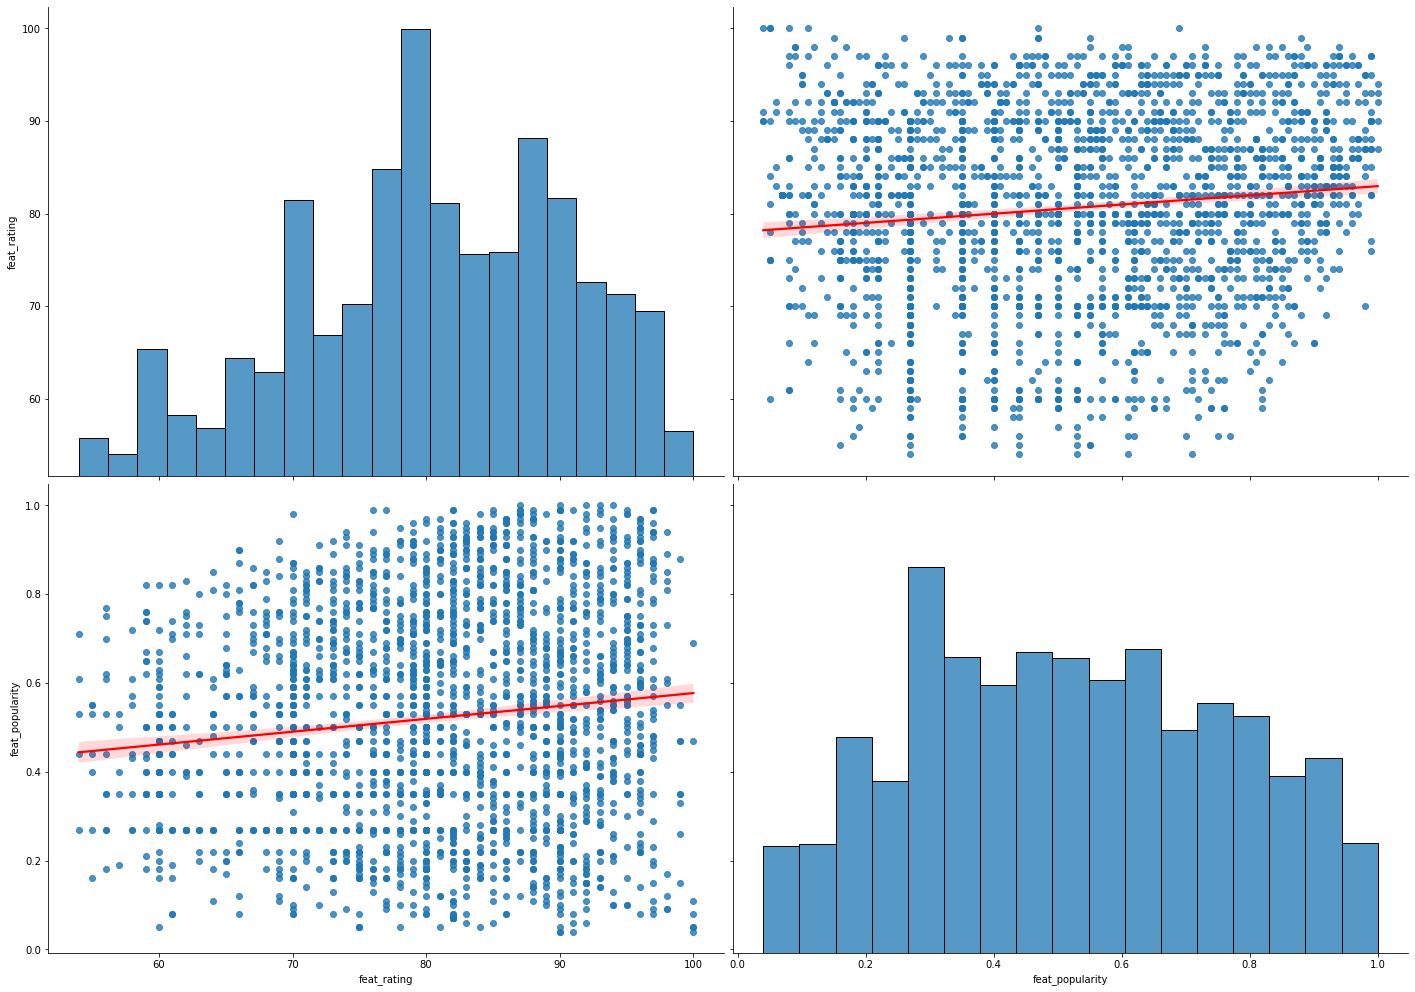

In [6]:
df_chart = df[['feat_rating', 'feat_popularity']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)

In [7]:
### SHAP

import scipy.stats as stats
import shap
from xgboost import XGBRegressor

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

model = XGBRegressor()
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

for col, imp in df_shap.abs().mean().sort_values(ascending=False)[:10].items():
    print(f'{col}: {imp:0.3f}')

feat_rating: 0.254
feat_tags_meta_indie: 0.153
feat_tags_meta_adventure: 0.097
feat_tags_meta_strategy: 0.049
feat_tags_meta_party: 0.038
feat_tags_meta_rpg: 0.035
feat_tags_meta_action: 0.033
feat_popularity: 0.031
feat_tags_meta_magic: 0.028
feat_tags_meta_tactical: 0.023


In [19]:
corrs = []
for col in X.columns:
    corr, _ = stats.spearmanr(df[col], df_shap[col])
    corr = corr if not np.isnan(corr) else 0
    corrs.append((col, corr))

c_i = [(col, corr, df_shap[col].abs().mean()) for col, corr in corrs]
c_i = sorted(c_i, key=lambda x: x[1]*x[2], reverse=True)

for col, corr, shap_imp in c_i:
    if 'text' not in col:
        print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')

feat_rating: 0.917//0.254
feat_tags_meta_adventure: 0.853//0.097
feat_tags_meta_action: 0.764//0.033
feat_popularity: 0.712//0.031
feat_tags_meta_turn_based: 0.576//0.013
feat_tags_meta_sports: 0.428//0.013
feat_tags_meta_fantasy: 0.763//0.007
feat_tags_meta_scifi: 0.681//0.005
feat_tags_meta_rts: 0.561//0.006
feat_tags_meta_2d: 0.419//0.006
feat_tags_meta_gore: 0.324//0.005
feat_tags_meta_horror: 0.510//0.003
feat_tags_meta_medieval: 0.318//0.002
feat_tags_meta_platformer: 0.500//0.001
feat_tags_meta_aliens: 0.354//0.001
feat_tags_meta_coop: 0.527//0.000
feat_tags_meta_survival: 0.288//0.000
feat_tags_meta_first_person: 0.244//0.000
feat_tags_meta_historical: 0.231//0.000
feat_tags_meta_crafting: 0.063//0.000
feat_tags_meta_racing: 0.414//0.000
feat_tags_meta_narrative: 0.142//0.000
feat_tags_meta_roguelike: 0.000//0.000
feat_tags_meta_vr: 0.000//0.000
feat_tags_meta_management: -0.452//0.000
feat_tags_meta_exploration: -0.449//0.000
feat_tags_meta_casual: -0.416//0.000
feat_tags_meta

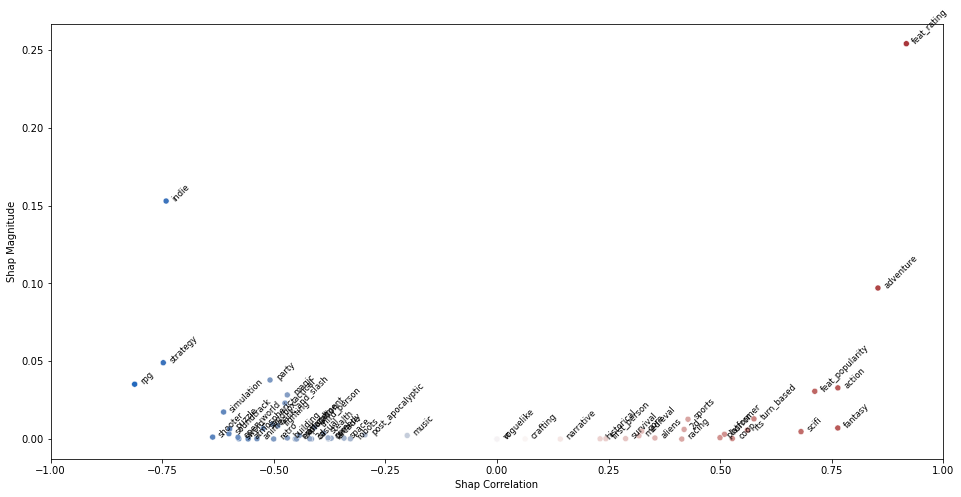

In [10]:
col = [col.replace('feat_tags_meta_', '') for col, _, _ in c_i if 'text' not in col]
x = [corr for col, corr, _ in c_i if 'text' not in col]
y = [mag for col, _, mag in c_i if 'text' not in col]
xy = [corr*mag for col, corr, mag in c_i if 'text' not in col]

df_chart = pd.DataFrame({
    'col': col,
    'x': x,
    'y': y,
    'xy': xy
})
outlier = 0.20
#df = df[(df.xy > df.xy.quantile(1-outlier)) | (df.xy < df.xy.quantile(outlier))]

plt.figure(figsize=(16,8))
pal = sns.color_palette("vlag", as_cmap=True)
sns.scatterplot(x='x', y='y', data=df_chart, hue='x', palette=pal)
plt.xlim(-1, 1)
plt.legend('',frameon=False)
plt.xlabel('Shap Correlation')
plt.ylabel('Shap Magnitude')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.01, point['y'], str(point['val']), fontsize='small', rotation=45)

label_point(df_chart.x, df_chart.y, df_chart.col, plt.gca())  

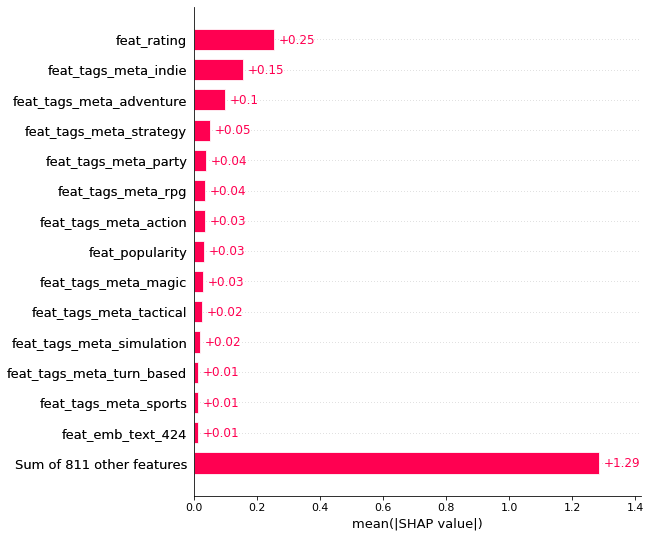

In [11]:
shap.plots.bar(shap_values, max_display=15)

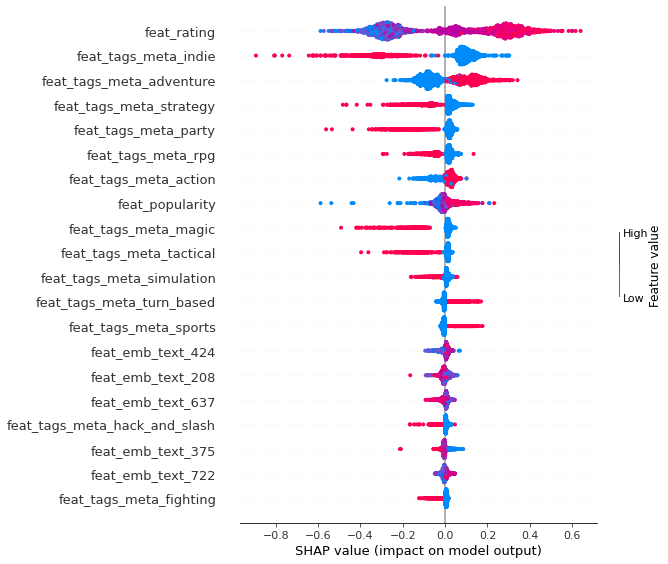

In [12]:
shap.summary_plot(shap_values, X)

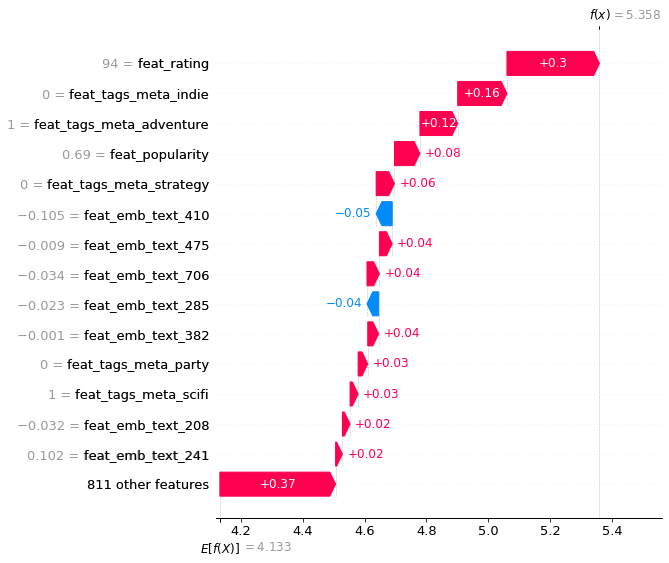

In [13]:
idx = df[df['input_name'] == 'ASTRO BOT: Rescue Mission'].index[0]
shap.plots.waterfall(shap_values[idx], max_display=15)

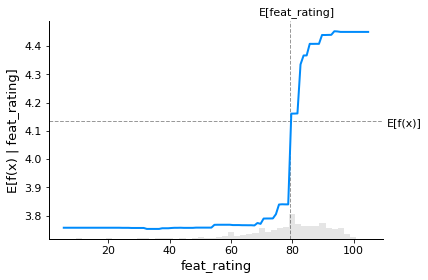

In [14]:
fig,ax = shap.partial_dependence_plot(
    "feat_rating", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
)

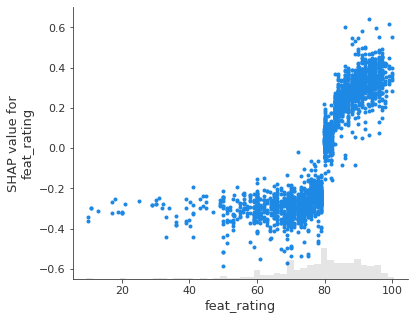

In [15]:
shap.plots.scatter(shap_values[:,"feat_rating"])

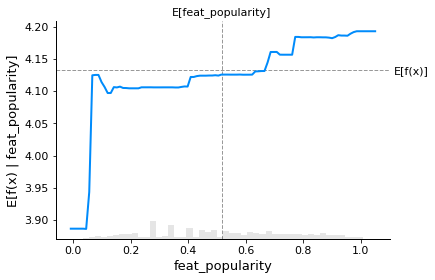

In [16]:
fig,ax = shap.partial_dependence_plot(
    "feat_popularity", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

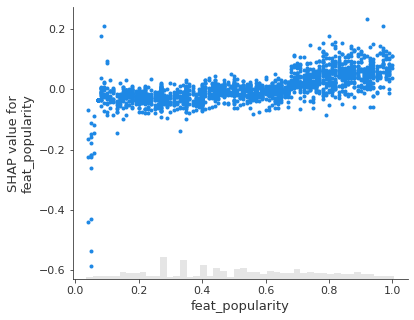

In [17]:
shap.plots.scatter(shap_values[:,"feat_popularity"])